Accuracy on test set:
50.0 %
The predicted class label for the new show is: NO


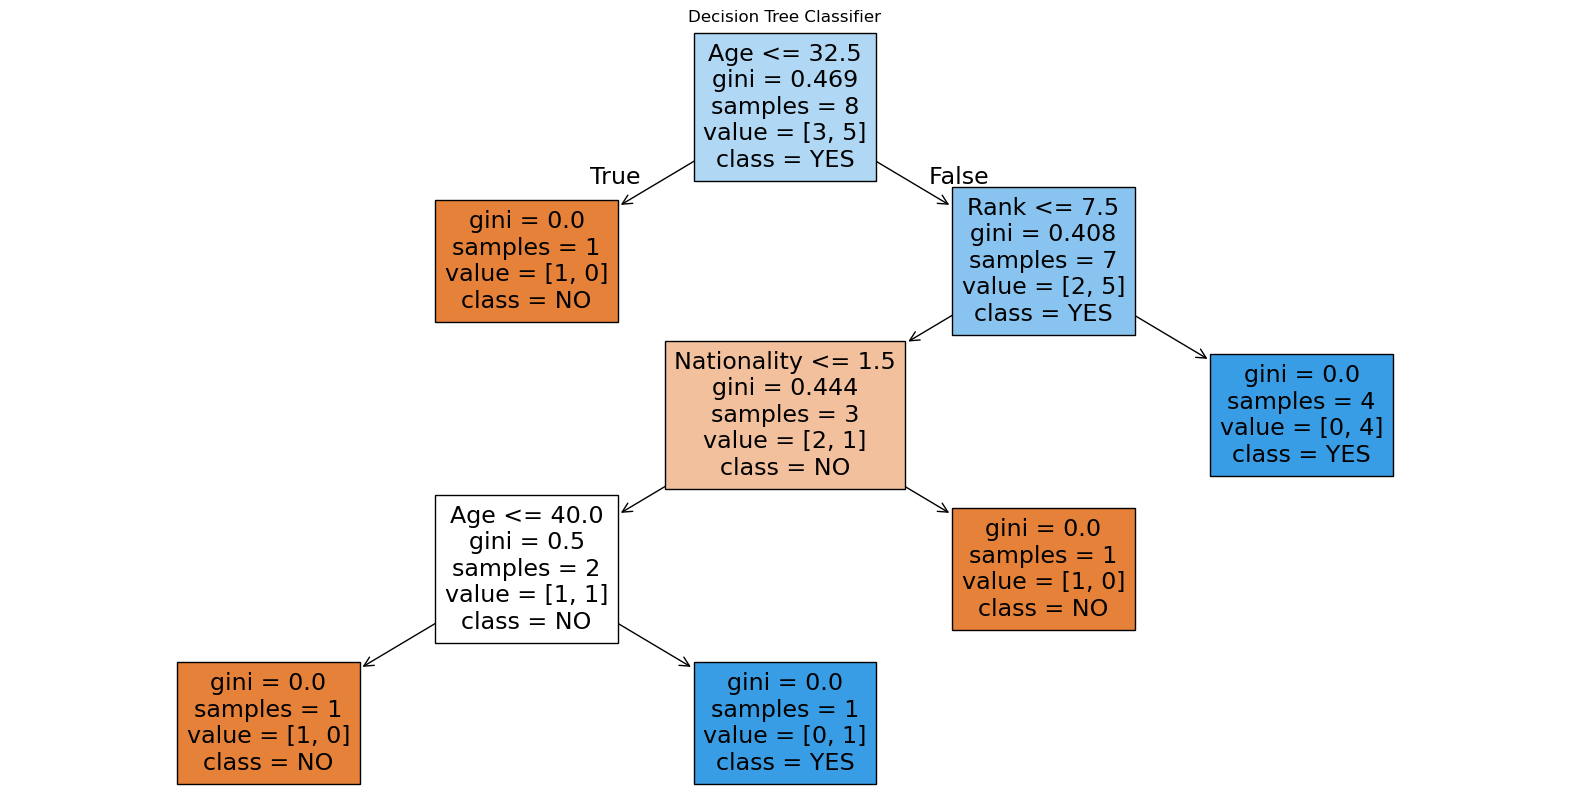

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('show.csv')

# Initialize label encoders
label_encoder = {}

# Encode categorical columns
for column in ['Nationality', 'Go']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoder[column] = le

# Features and target variable
x = data[['Age', 'Experience', 'Rank', 'Nationality']]
y = data['Go']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Predict and evaluate
y_pred = clf.predict(x_test)
print("Accuracy on test set:")
acc_s=accuracy_score(y_test, y_pred)
print(acc_s*100,"%")
# Prepare new data for prediction
new_data = pd.DataFrame({
    'Age': [40],
    'Experience': [10],
    'Rank': [7],
    'Nationality': [label_encoder['Nationality'].transform(['USA'])[0]]
})

# Predict the class for new data
prediction = clf.predict(new_data)
predicted_label = label_encoder['Go'].inverse_transform(prediction)

print(f"The predicted class label for the new show is: {predicted_label[0]}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=['Age', 'Experience', 'Rank', 'Nationality'], class_names=['NO', 'YES'], filled=True)
plt.title('Decision Tree Classifier')
plt.show()


Accuracy: 100.0
Predicted class: YES


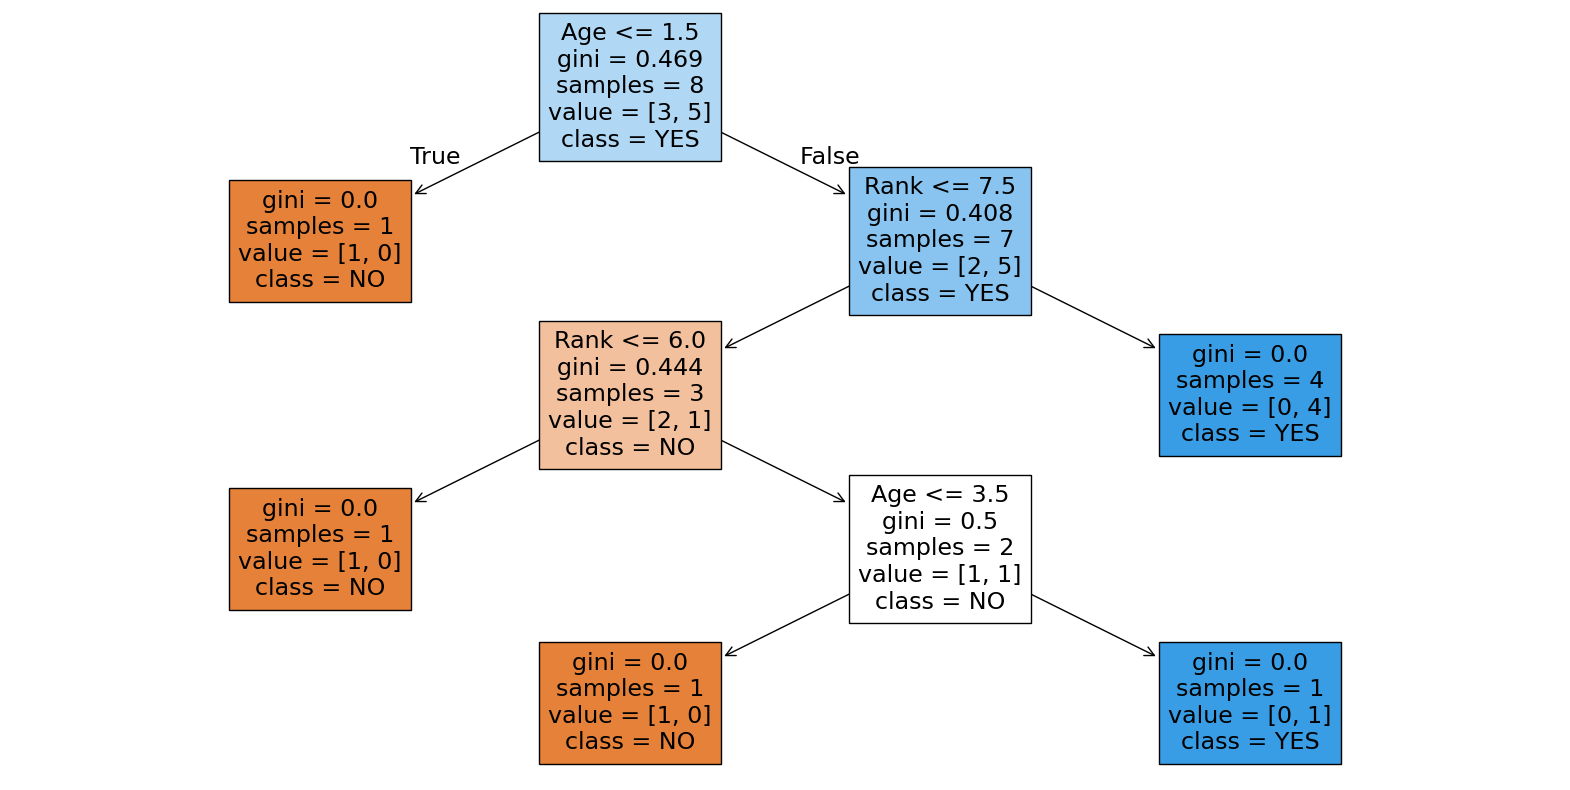

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and encode data
data = pd.read_csv('show.csv')
NC=data[['Age','Nationality']]
for col in NC:
    data[col] = LabelEncoder().fit_transform(data[col])

# Split features and target
X = data.drop(columns='Go')
y = data['Go']

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)

# Predictions and evaluation
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test))*100)

# Predict for new data
new_data = pd.DataFrame({'Age': [40], 'Experience': [10], 'Rank': [7], 'Nationality': [0]})  # Replace 0 with encoded value
print("Predicted class:", clf.predict(new_data)[0])

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['NO', 'YES'], filled=True)
plt.show()

